## Credit Fraud Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Evaluating machine learning models, particularly in terms of fairness and performance, under various dynamic and biased conditions


### 2) Data Collection
- From: Bank Account Fraud Dataset Suite (NeurIPS 2022)
- Dataset Source - https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data 

Each dataset is composed of:
- 1 million instances;
- 30 realistic features used in the fraud detection use-case;
- A column of “month”, providing temporal information about the dataset;
- Protected attributes, (age group, employment status and % income).

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/fraud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [4]:
df['proposed_credit_limit'].unique()

array([1500.,  200.,  500., 1000.,  990.,  510., 2000.,  210.,  490.,
        190., 1900., 2100.])

In [5]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

#### Shape of the dataset

In [6]:
df.shape

(1000000, 32)

In [7]:
# Determin number of fraud cases and plot

fraud = df[df["fraud_bool"] == 1]
valid = df[df["fraud_bool"] == 0]

print(f"Fraud Applications: {len(fraud)} ")
print(f"Total Applications: {len(valid)}")
print(f"Fraction of fraud and non fraud: {len(fraud)/ len(valid)}")

Fraud Applications: 11029 
Total Applications: 988971
Fraction of fraud and non fraud: 0.011151995356790038


### 2.2 Dataset information

#### Read from datasheet.pdf

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

### 3.5 Check statistics of data set

In [12]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


#### Insight
- Mean customer age is 33
- Some variables contains negative values, this indicate missing data that need to be processed

### 3.7 Exploring Data

In [13]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [15]:
df['device_fraud_count'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: device_fraud_count, Length: 1000000, dtype: int64>

In [16]:
# define numerical & categorical columns
numeric_features = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request'
                    , 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 
                    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',  'session_length_in_minutes',
                    'device_distinct_emails', 'device_fraud_count', 'month']


categorical_features = ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid','phone_mobile_valid', 'has_other_cards'
                        , 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 20 numerical features : ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails', 'device_fraud_count', 'month']

We have 12 categorical features : ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool']


### 3.8 Visualizing distribution of all the variables
- Protected attributes, (age group, employment status and % income).

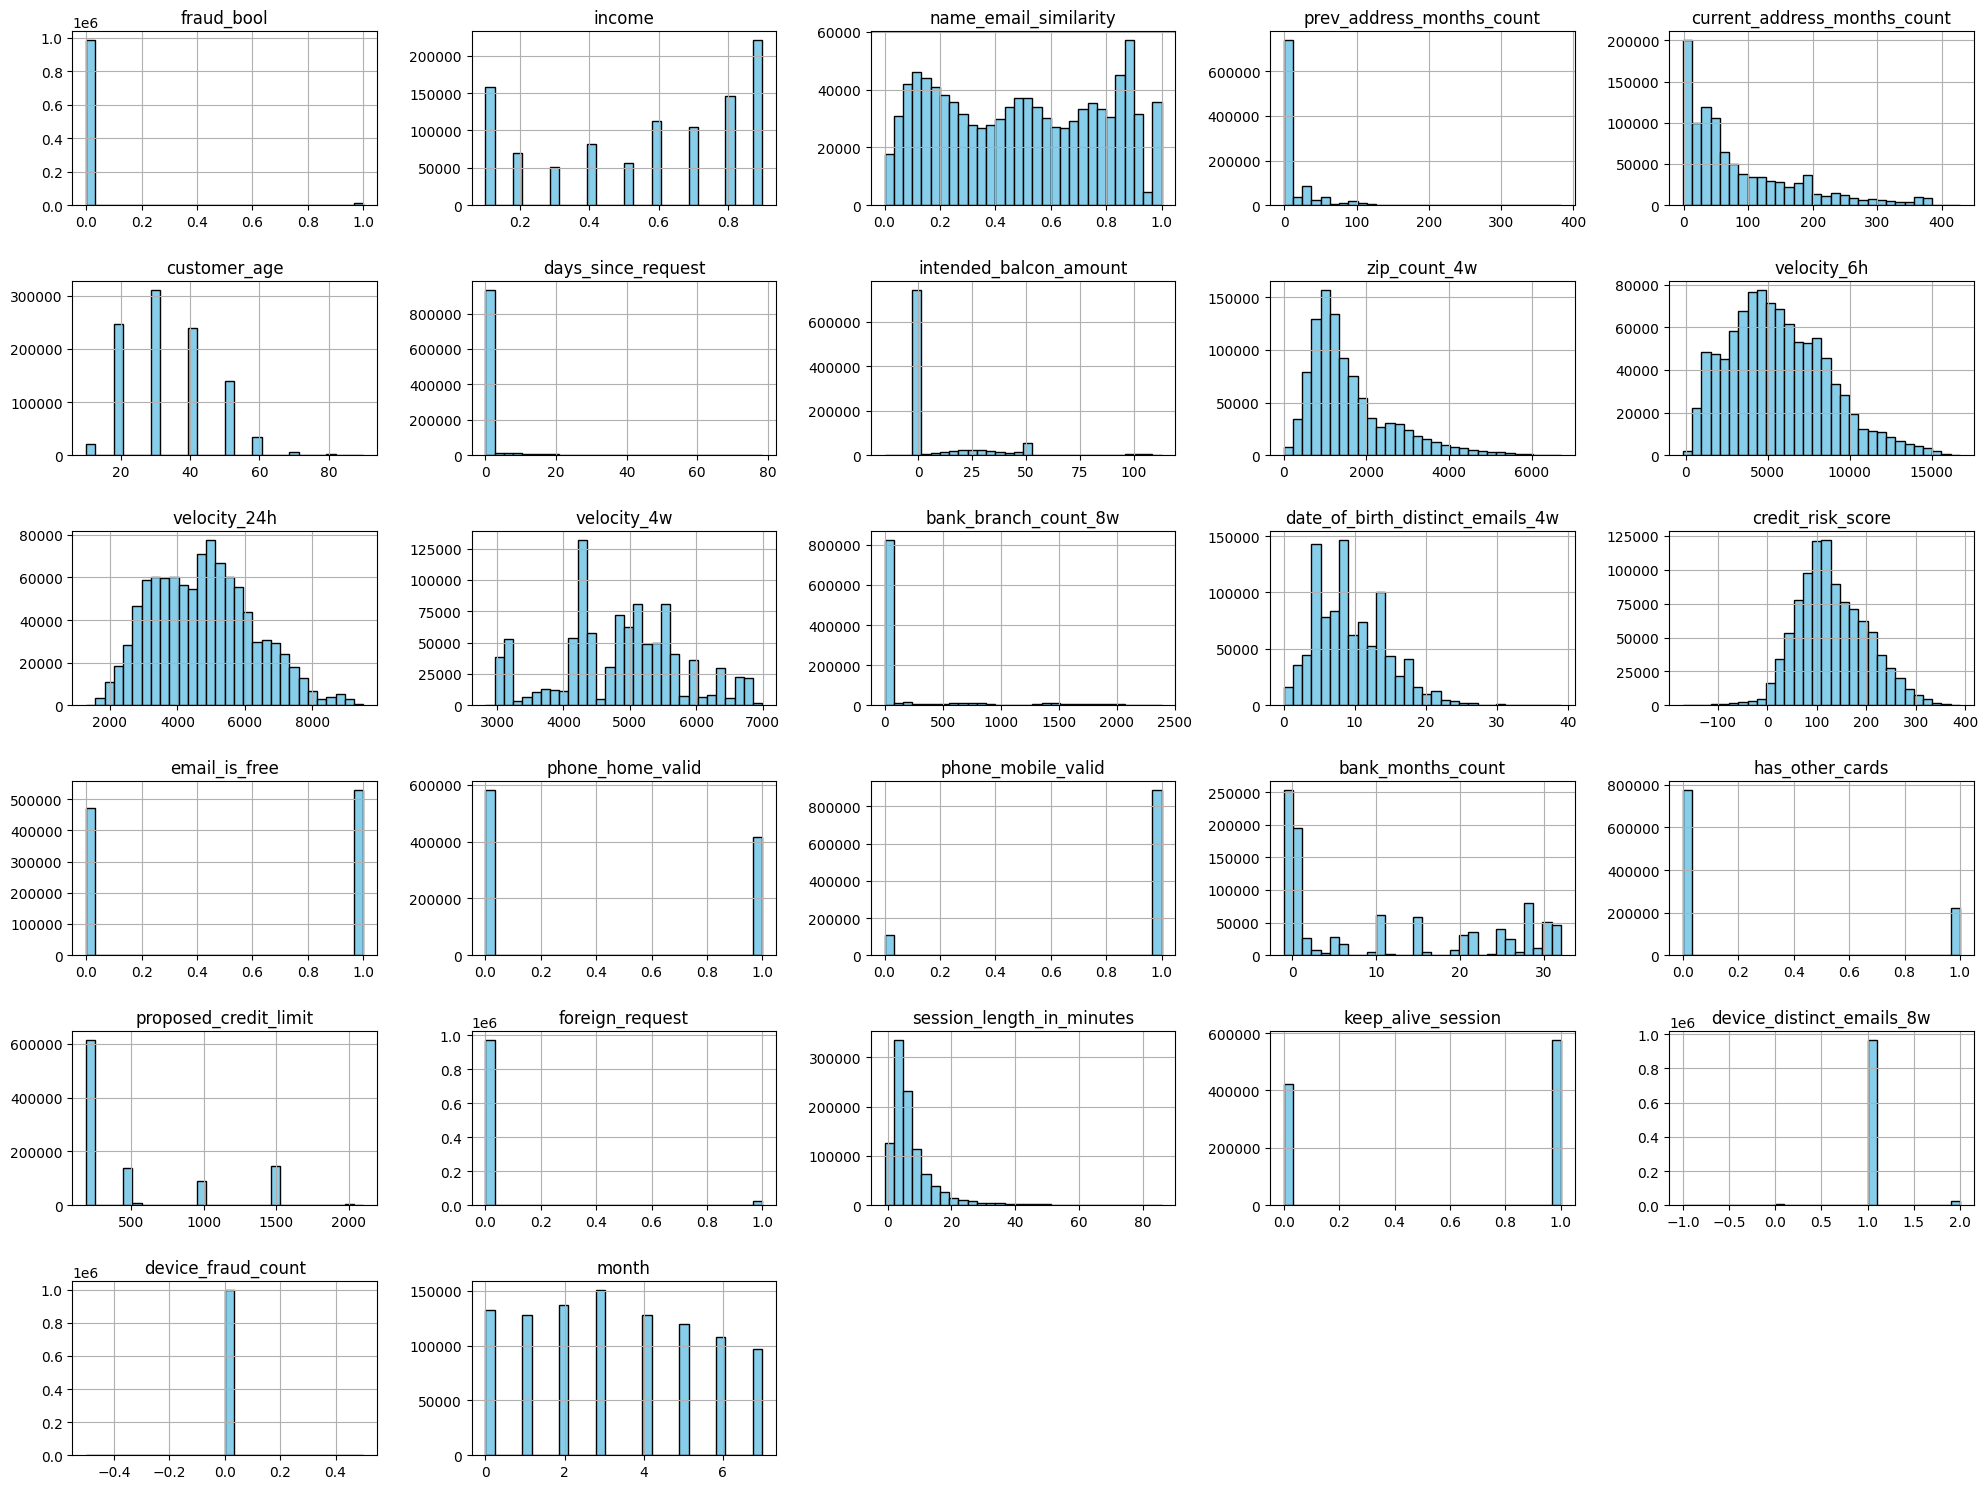

In [17]:
# Automatically plots histograms for all numerical columns
df.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')

plt.tight_layout()  # Adjusts subplot params for a neat layout
plt.show()

#### Insights:
- device_fraud_count only have unique value of 0 -> consider drop to reduce dimension

In [18]:
grouped = df.groupby(["phone_mobile_valid", 'fraud_bool']).size()
percentage = (grouped / grouped.sum()) 
print(grouped)
print(percentage)

phone_mobile_valid  fraud_bool
0                   0             108676
                    1               1648
1                   0             880295
                    1               9381
dtype: int64
phone_mobile_valid  fraud_bool
0                   0             0.108676
                    1             0.001648
1                   0             0.880295
                    1             0.009381
dtype: float64


In [19]:
email_free = df.groupby(["email_is_free", 'fraud_bool']).size()
p_email = (email_free / email_free.sum()) 
print(email_free)
print(p_email)

email_is_free  fraud_bool
0              0             466376
               1               3738
1              0             522595
               1               7291
dtype: int64
email_is_free  fraud_bool
0              0             0.466376
               1             0.003738
1              0             0.522595
               1             0.007291
dtype: float64


- not much different between two group

In [20]:
foreign = df.groupby(["foreign_request", 'fraud_bool']).size()
p_f = (foreign / foreign.sum()) 
print(foreign)
print(p_f)

foreign_request  fraud_bool
0                0             964284
                 1              10474
1                0              24687
                 1                555
dtype: int64
foreign_request  fraud_bool
0                0             0.964284
                 1             0.010474
1                0             0.024687
                 1             0.000555
dtype: float64


#### Note : Some variables contains negative values, this indicate missing data that need to be processed

### 4. Data Cleaning and Preprocessing

- Workflow:

1. Split your data into train and test sets.
2. Drop, Impute missing values (fit on train, transform test).
3. Select features (fit on train, apply to test).
4. Scale numerical features (fit on train, transform test).
5. Encode categorical features (fit on train, transform test).

#### 4.1 Handling Missing Values

In [21]:
# If you want to apply this to specific columns only, specify the column names
columns_to_check = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 
                    'session_length_in_minutes', 'device_distinct_emails_8w']  
df[columns_to_check] = df[columns_to_check].where(df[columns_to_check] >= 0, np.nan)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         287080 non-null   float64
 4   current_address_months_count      995746 non-null   float64
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            257477 non-null   float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

#### 4.1.2 Draw box plot of all missing data


In [23]:
df_missing = df[['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 
                 'device_distinct_emails_8w']]
df_missing

,prev_address_months_count,current_address_months_count,intended_balcon_amount,bank_months_count,session_length_in_minutes,device_distinct_emails_8w
0,NaN,25.0,102.453711,9.0,16.224843,1.0
1,NaN,89.0,NaN,2.0,3.363854,1.0
2,9.0,14.0,NaN,30.0,22.730559,1.0
3,11.0,14.0,NaN,1.0,15.215816,1.0
4,NaN,29.0,47.152498,26.0,3.743048,1.0
...,...,...,...,...,...,...
999995,NaN,143.0,NaN,31.0,16.967770,1.0
999996,NaN,193.0,0.008307,NaN,1.504109,1.0
999997,NaN,202.0,50.609995,31.0,16.068595,1.0
999998,52.0,3.0,NaN,1.0,1.378683,1.0


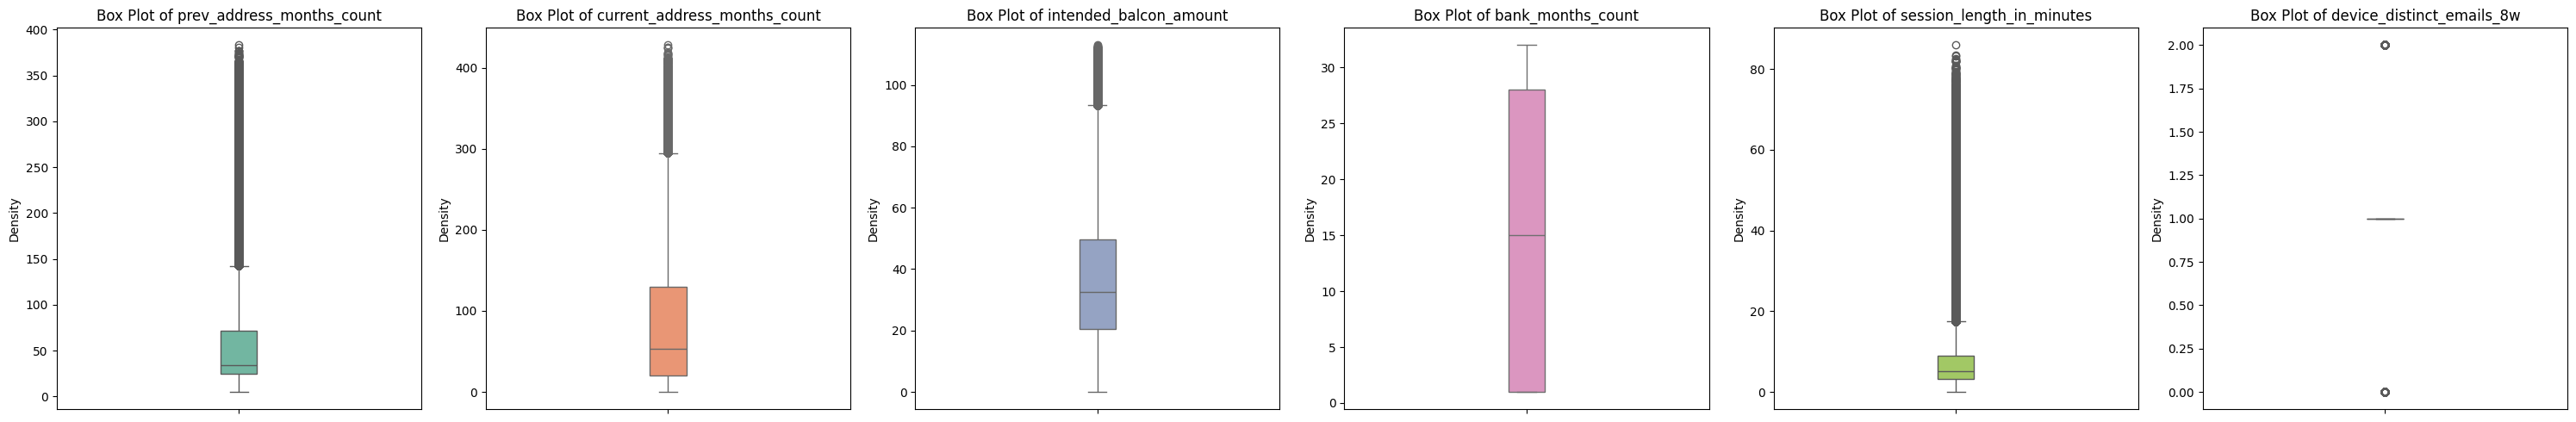

In [24]:
# Create box plots for multiple features
# Determine the number of features
num_features = len(df_missing.columns)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(num_features * 5, 5))

# Ensure axes is iterable
if num_features == 1:
    axes = [axes]

# Define a color palette
colors = sns.color_palette('Set2', num_features)

# Loop through each feature
for i, (ax, column) in enumerate(zip(axes, df_missing.columns)):
    # Plot the KDE plot
    #sns.kdeplot(data=df_missing[column], ax=ax, color=colors[i], fill=True, alpha=0.3)
    
    # Add the box plot on the same axes
    sns.boxplot(y=df_missing[column], ax=ax, width=0.1, color=colors[i])

    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights

- Scaling, encoding: 
    - **device_distinct_emails_8w**: One-Hot Encoding (nominal categorical)
    - **session_length_in_minutes**: Robust Scaling (outliers)
    - **intended_balcon_amount**: consider dropping (High percentage of missing in a feature)
    - **current_address_months_count**: Robust Scaling (outliers)
    - **prev_address_months_count**: consider dropping (High percentage of missing in a feature)
- Filling NA:
    - **device_distinct_emails_8w**: SimpleImputer(strategy='most_frequent')
    - **session_length_in_minutes**: SimpleImputer(strategy='median')
    - **intended_balcon_amount**: consider dropping (High percentage of missing in a feature)
    - **current_address_months_count**: SimpleImputer(strategy='median') (outliers)
    - **prev_address_months_count**: consider dropping (High percentage of missing in a feature)

#### 4.1.3 Dropping features 

In [25]:
#drop intended_balcon_amount and prev_address_months_count

df.drop(['prev_address_months_count', 'intended_balcon_amount', 'device_fraud_count'], axis=1, inplace=True)
df.shape

(1000000, 29)

#### 4.1.4 Split data into train and tests

In [29]:
# Split your dataset BEFORE fitting any preprocessing to avoid data leakage
from sklearn.model_selection import train_test_split

X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [30]:
X_train.shape, X_test.shape

((800000, 28), (200000, 28))

### 4.2 Building Pipeline for Imputing missing values, scale features, feature selection

##### 1. Binary Variables
The following features are already binary, so we can generally keep them as 0/1 (or False/True) without further encoding:
- email_is_free (free vs. paid)
- phone_home_valid (invalid vs. valid)
- phone_mobile_valid (invalid vs. valid)
- has_other_cards (no vs. yes)
- foreign_request (same country vs. different country)
- keep_alive_session (off vs. on)

##### 2. Categorical Variables (Nominal)
For categorical variables with a small number of distinct categories (like 2 to ~10), One-Hot Encoding is a common, straightforward option. This expands each category into its own feature column containing 0 or 1.

- a. payment_type
Possible Values: 5 anonymized categories.
Recommended Encoding: One-Hot Encoding (a new column for each of the 5 categories; typically results in 4 additional columns if drop_first=True).

- b. employment_status
Possible Values: 7 anonymized categories.
Recommended Encoding: One-Hot Encoding, which would create up to 7 columns (6 with drop_first=True).

- c. housing_status
Possible Values: 7 anonymized categories.
Recommended Encoding: One-Hot Encoding (again, up to 7 new columns).

- d. source
Possible Values: 2 (INTERNET, TELEAPP).
Recommended Encoding: One-Hot Encoding or binary mapping. Since there are only two values, you could do:
1 = INTERNET, 0 = TELEAPP
or just use One-Hot (which produces a single dummy column if you use drop_first=True).

- e. device_os
Possible Values: 5 (Windows, macOS, Linux, X11, other).
Recommended Encoding: One-Hot Encoding (4 columns if drop_first=True).

In [68]:
# Identify which columns are numeric vs. categorical
num_features = ['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request'
                    , 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 
                    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',  'session_length_in_minutes',
                    'device_distinct_emails_8w', 'month']


cat_features = ['payment_type', 'employment_status', 'housing_status',
                         'source', 'device_os']

binary_features = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
]

len(num_features), len(cat_features), len(binary_features)

(17, 5, 6)

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2





# Building pipeline


# --- Numerical Pipeline ---
# 1. Impute missing values (median) (distribution of missing data is mostly skewed)
# 2. Scale features (Robust scaler) 
# 3. Feature selection with f_classif (for classification with numeric features)

numeric_pipeline = Pipeline(
    [
        ('num_imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('num_feature_select', SelectKBest(score_func=f_classif, k='all')) # Annova F measure
    ]
)

# --- Categorical Pipeline ---
# 1. Impute missing values (most frequent)
# 2. OneHotEncoder
# 3. Feature selection with chi2 or mutual_info_classif

cat_pipeline = Pipeline(
    [
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder()),
        ('cat_feature_select', SelectKBest(score_func=chi2, k='all'))
    ]
)

# --- Binary Pipeline ------
# -----------------------------------------------
# Usually, keep binary features as 0/1 with minimal or no transformation.
# - Optional imputation if these fields have missing values
# - Typically no scaling or OHE needed

binary_pipeline = Pipeline([
    
    ('bin_imputer', SimpleImputer(strategy='most_frequent')),

])


# --- Combine Pipelines into a ColumnTransformer 

preprocessor = ColumnTransformer(
    [
        ("num_pipeline", numeric_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features), 
        ("binary_pipeline", binary_pipeline, binary_features)
    ]
)

#### We will use Logistic Regression with GridSearchCV to choose the best **k**


#### Remark
- The data is highly imbalance, therefore we need to sample the data later inorder to balance out two class in target variable.
When should we use sample technique such as SMOTE and Nearmiss? 

- According to the paper, feature selection should be performed before applying SMOTE when dealing with high-dimensional data. The reasoning is that performing feature selection first helps reduce the dimensionality, removing irrelevant variables that could otherwise negatively influence the oversampling process and the classification results.

Here’s the relevant quoted part from the paper:

"In practice, only k-NN classifiers seem to benefit substantially from the use of SMOTE in the high-dimensional setting, provided that variable selection is performed before using SMOTE; the benefit is larger if more neighbors are used. SMOTE for k-NN without variable selection should not be used, because it surprisingly biases the classification towards the minority class."

Additionally:

"Variable selection is generally advisable for high-dimensional data, as it removes some of the noise from the data. SMOTE does not affect the ranking of variables if the variable selection method is based on class-specific means and variances."

This emphasizes that variable selection before SMOTE is critical for improving the effectiveness of classifiers, especially k-NN, when working with high-dimensional datasets.
https://pmc.ncbi.nlm.nih.gov/articles/PMC3648438/

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Combine the 'preprocessor' (ColumnTransformer) with a final classifier
final_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


param_grid = {
    "preprocessing__num_pipeline__num_feature_select__k": [5, 10, 15, "all"],
    "preprocessing__cat_pipeline__cat_feature_select__k": [5, 10, 15, "all"],
    # You could also tune classifier hyperparameters, e.g.:
    # "classifier__C": [0.1, 1.0, 10]
}


In [74]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=final_pipeline,
    param_grid=param_grid,
    scoring="recall",  # Instead of "roc_auc"
    cv=5,
    n_jobs=-1, # Use all cores
    refit=True
)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('num_feature_select',
                                                                                          SelectKBest(k='all'))]),
                                                                         ['income',
                                                                          'name_email_similarity',
                                                                          'current_address_months_count',
                                                                          'customer_age',
                                                                          'days_since_request',
                                                                          'zi...
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['email_is_free',
                                                                          'phone_home_valid',
                                                                          'phone_mobile_valid',
                                                                          'has_other_cards',
                                                                          'foreign_request',
                                                                          'keep_alive_session'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'preprocessing__cat_pipeline__cat_feature_select__k': [5,
                                                                                10,
                                                                                15,
                                                                                'all'],
                         'preprocessing__num_pipeline__num_feature_select__k': [5,
                                                                                10,
                                                                                15,
                                                                                'all']},
             scoring='recall')

In [75]:
from sklearn.metrics import classification_report
print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best params: {'preprocessing__cat_pipeline__cat_feature_select__k': 'all', 'preprocessing__num_pipeline__num_feature_select__k': 'all'}
Best CV score: 0.009406897792166915
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       0.62      0.01      0.02      2206

    accuracy                           0.99    200000
   macro avg       0.80      0.51      0.51    200000
weighted avg       0.99      0.99      0.98    200000



#### Insights

Class 1

Precision: 0.62
Interpretation: When the model predicts Class 1, it's correct 62% of the time.
Recall: 0.01
Interpretation: The model only correctly identifies 1% of all actual Class 1 instances.

In [78]:
def prepare_inputs(X_train,y_train, X_test, preprocessor):
	preprocessor_obj = preprocessor
	
	X_train_enc = preprocessor_obj.fit_transform(X_train,y_train)
	X_test_enc = preprocessor_obj.transform(X_test)
	return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test, preprocessor):
	preprocessor_obj = preprocessor
	y_train_enc = preprocessor_obj.fit_transform(y_train)
	y_test_enc = preprocessor_obj.transform(y_test)
	return y_train_enc, y_test_enc

In [81]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train,y_train ,X_test, preprocessor)

In [82]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test, preprocessor)

IndexError: tuple index out of range